# FinanceDataReader 사용자 안내서

<img src="https://i.imgur.com/r0YE5Xs.png"> 

한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

<!-- TEASER_END -->
### 2018 FinanceData.KR

In [9]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

# 개요

금융 데이터를 다루는데 가장 기본이 되는 데이터는 거래소별 전체 종목 코드와 가격 데이터 이다.

[pandas-datareader](https://pandas-datareader.readthedocs.io) 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다.  (현재 버전 : pandas_datareader 0.6.0) 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다. 

FinanceDataReader는 [pandas-datareader](https://pandas-datareader.readthedocs.io) 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.

### 종목 코드
* 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500

### 가격 데이터
* 해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등
* 국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등
* 각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
* 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율
* 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)


# 설치

```bash
pip install -U finance_datareader
```

# 사용

In [2]:
import FinanceDataReader as fdr
fdr.__version__

'0.7.1'

# 전체 종목 코드
종목 데이터 전체를 얻기 위해 사용할 수 있는 거래소 심볼은 다음과 같다

### 한국

심볼 | 거래소
--------|---------
KRX | KRX 종목 전체
KOSPI | KOSPI 종목   
KOSDAQ  | KOSDAQ 종목 
KONEX  | KONEX 종목


### 미국
심볼 | 거래소 |
--------|---------
NASDAQ | 나스닥 종목 
NYSE  |뉴욕 증권거래소 종목	 
AMEX  | AMEX 종목  
SP500 | S&P 500 종목 


※ KRX는 KOSPI,KOSDAQ,KONEX 모두 포함

In [3]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,011150,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입"
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [4]:
len(df_krx)

2258

In [5]:
import FinanceDataReader as fdr

# S&P 500 종목 전체
df_spx = fdr.StockListing('S&P500')
df_spx.head()

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services


In [6]:
len(df_spx)

505

# 가격 데이터 - 국내주식
단축 코드(6자리)를 사용.

* 코스피 종목: 068270(셀트리온), 005380(현대차)  등
* 코스닥 종목: 215600(신라젠), 151910(나노스) 등

In [7]:
import FinanceDataReader as fdr

# 신라젠, 2018년
df = fdr.DataReader('215600', '2018-01-01')
df.head(10)

,Date,Open,High,Low,Close,Volume,Change
Date,,,,,,,
2018-01-02,2018-01-02,95900,104000,93300,102500,6824281,0.096257
2018-01-03,2018-01-03,102600,104900,99500,103000,4760150,0.004878
2018-01-04,2018-01-04,102600,104000,92200,92200,6538665,-0.104854
2018-01-05,2018-01-05,85800,101200,85700,100000,8318372,0.084599
2018-01-08,2018-01-08,98000,98400,92500,93800,6352776,-0.062000
2018-01-09,2018-01-09,96500,119200,93800,109000,12734902,0.162047
2018-01-10,2018-01-10,105000,107300,97800,98000,6588397,-0.100917
2018-01-11,2018-01-11,97600,100600,95200,96700,4115386,-0.013265
2018-01-12,2018-01-12,99800,103300,97100,98100,6806596,0.014478


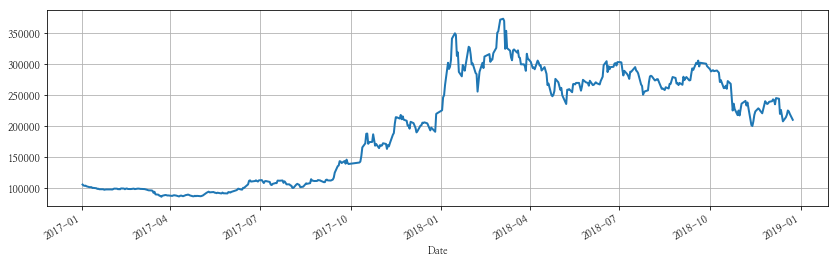

In [10]:
import FinanceDataReader as fdr

# 셀트리온, 2017년~현재
df = fdr.DataReader('068270', '2017-01-01')
df['Close'].plot()

# 가격 데이터 - 미국 주식
티커를 사용. 예를 들어, 'AAPL'(애플), 'AMZN'(아마존), 'GOOG'(구글)

In [11]:
import FinanceDataReader as fdr

# 애플(AAPL), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-03-23,164.94,168.39,169.92,164.94,41030000.0,-0.0232
2018-03-26,172.77,168.07,173.10,166.44,37540000.0,0.0475
2018-03-27,168.34,173.68,175.15,166.92,40920000.0,-0.0256
2018-03-28,166.48,167.25,170.02,165.19,41670000.0,-0.0110
2018-03-29,167.78,167.81,171.75,166.90,38400000.0,0.0078


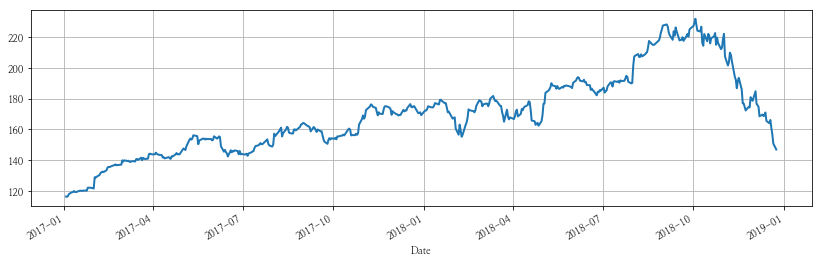

In [12]:
import FinanceDataReader as fdr

# 애플(AAPL), 2017년
df = fdr.DataReader('AAPL', '2017')
df['Close'].plot()

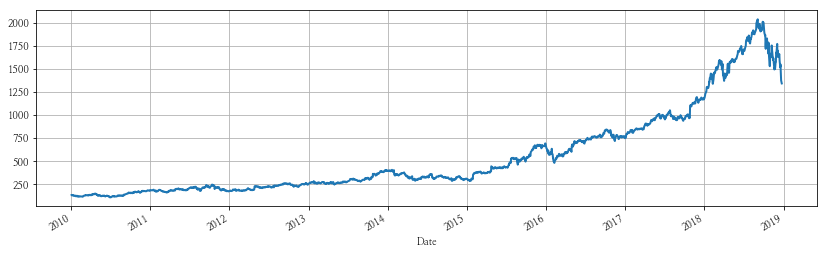

In [13]:
import FinanceDataReader as fdr

# 아마존(AMZN), 2010~현재
df = fdr.DataReader('AMZN', '2010')
df['Close'].plot()

# 한국 지수
심볼 | 설명
---------- | ---------------
KS11 | KOSPI 지수
KQ11 | KOSDAQ 지수
KS50 | KOSPI 50 지수
KS100 | KOSPI 100 지수
KS200 | KOSPI 200 지수
KRX100 | KRX 100 


# 미국 지수
심볼 | 설명
---------- | ---------------
DJI | 다우존스 지수
IXIC | 나스닥 지수
US500 | S&P 500 지수
VIX | S&P 500 VIX

※ DJI, IXIC, US500 가 미국 3대 지수

# 국가별 주요 지수
심볼 | 설명
---------- | ---------------
JP225 | 닛케이 225 선물
STOXX50 | 유렵 STOXX 50
HSI | 항셍 (홍콩)
CSI300 | CSI 300 (중국)
SSEC |  상해 종합
UK100 | 영국 FTSE
DE30 | 독일 DAX 30
FCHI | 프랑스 CAC 40

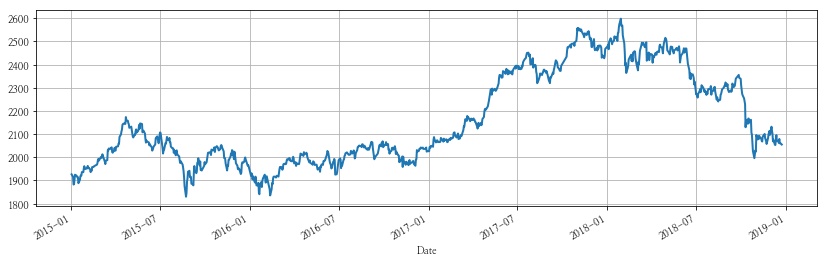

In [14]:
import FinanceDataReader as fdr

# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2015')
df['Close'].plot()

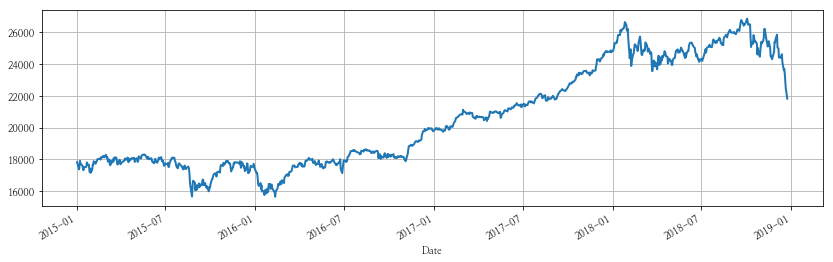

In [15]:
# 다우지수, 2015년~현재

df = fdr.DataReader('DJI', '2015')
df['Close'].plot()

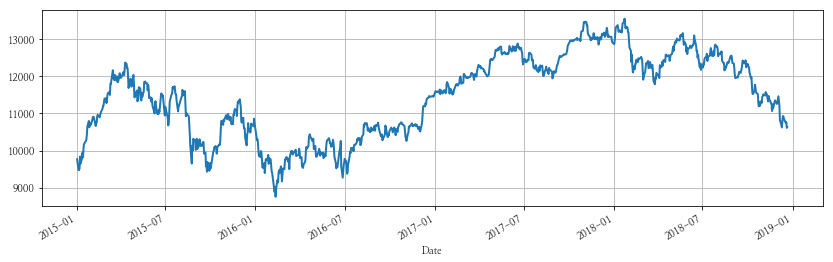

In [16]:
# DAX, 2015년~현재

df = fdr.DataReader('DE30', '2015')
df['Close'].plot()

# 환율

심볼 | 설명
---------- | ---------------
USD/KRW | 달러당 원화 환율
USD/EUR | 달러당 유로화 환율
USD/JPY | 달러당 엔화 환율
CNY/KRW | 위엔화 원화 환율
EUR/USD	| 유로화 달러 환율
USD/JPY | 달러 엔화 환율
JPY/KRW	| 엔화 원화 환율
AUD/USD	| 오스트레일리아 달러 환율
EUR/JPY	| 유로화 엔화 환율
USD/RUB	| 달러 루블화        

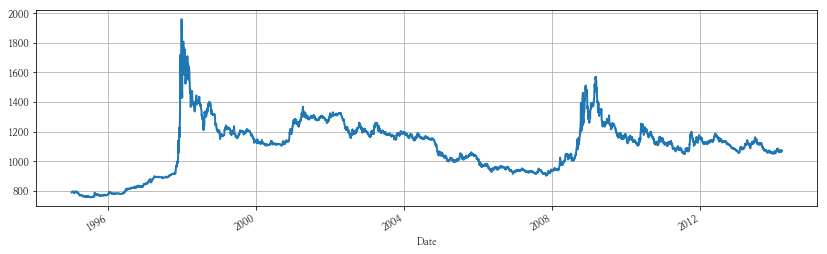

In [17]:
import FinanceDataReader as fdr

# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

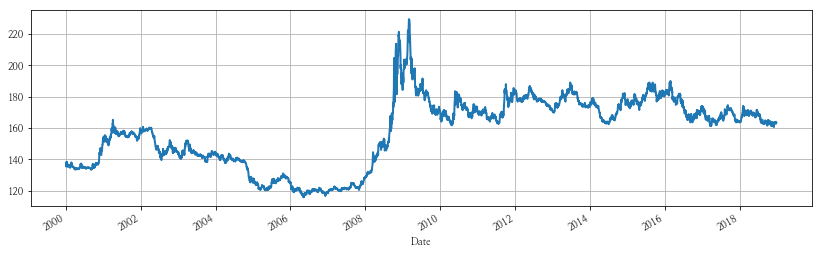

In [18]:
# 위엔화 환율, 1995년~현재

df = fdr.DataReader('CNY/KRW', '1995')
df['Close'].plot()

# 상품선물

심볼 | 설명
---------- | ---------------
NG | 천연가스 선물 (NYMEX)
GC | 금 선물 (COMEX)
SI | 은 선물 (COMEX)
HG | 구리 선물 (COMEX)
CL  | WTI유 선물 (NYMEX)

In [19]:
import FinanceDataReader as fdr

# 천연가스 선물 (NYMEX)
df = fdr.DataReader('NG', '2018')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-12-19,3.726,3.839,3.893,3.563,136940.0,-0.0292
2018-12-20,3.583,3.732,3.938,3.572,151310.0,-0.0384
2018-12-21,3.816,3.681,3.829,3.595,99260.0,0.0650
2018-12-23,3.735,3.686,3.736,3.677,0.0,-0.0212
2018-12-24,3.424,3.734,3.760,3.412,0.0,-0.0833


In [20]:
import FinanceDataReader as fdr

# WTI유 선물 (NYMEX)
df = fdr.DataReader('CL', '2018')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-12-19,47.20,45.93,48.00,45.93,37160.0,0.0208
2018-12-20,45.88,47.39,47.51,45.67,794130.0,-0.0280
2018-12-21,45.59,46.25,46.77,45.13,694000.0,-0.0063
2018-12-23,45.59,45.45,45.73,45.45,0.0,0.0000
2018-12-24,42.70,45.60,46.22,42.41,0.0,-0.0634


# 채권
### 한국
* 'KR\[년도\]YT=RR' 형식으로 조합 (가능 년도=1,2,3,4,5,10,20,30,50)

심볼 | 설명
---------- | ---------------
KR1YT=RR | 1년만기 한국 국채 수익률
KR3YT=RR | 1년만기 한국 국채 수익률
KR5YT=RR | 5년만기 한국 국채 수익률
KR10YT=RR | 10년만기 한국 국채 수익률

### 미국
* 'US\[개월\]MT=RR' 형식으로 조합 (가능 개월=1,3,6)
* 'US\[년도\]YT=RR' 형식으로 조합 (가능 년도=1,2,3,4,5,7,10,30)

심볼 | 설명
---------- | ---------------
US1MT=X | 1개월 미국 국채 수익률
US6MT=X | 6개월 미국 국채 수익률
US1YT=X | 1년만기 미국 국채 수익률
US5YT=X | 5년만기 미국 국채 수익률
US10YT=X | 10년만기 미국 국채 수익률
US30YT=X | 30년만기 미국 국채 수익률



In [21]:
import FinanceDataReader as fdr

# 10년만기 미국채 수익률
df = fdr.DataReader('US10YT=X', '2018')
df.tail()

,Close,Open,High,Low,Change
Date,,,,,
2018-12-19,2.762,2.819,2.861,2.750,-0.0216
2018-12-20,2.808,2.767,2.814,2.748,0.0167
2018-12-21,2.788,2.801,2.810,2.781,-0.0071
2018-12-23,2.788,2.788,2.788,2.788,0.0000
2018-12-24,2.737,2.799,2.801,2.737,-0.0186


#  암호화폐 가격 (KRW)
암호 화폐 원화 가격 (빗썸)

심볼 | 설명
---------- | ---------------
BTC/KRW | 비트코인 원화 가격
ETH/KRW | 이더리움 원화 가격
XRP/KRW | 리플 원화 가격
BCH/KRW | 비트코인 캐시 원화 가격
EOS/KRW | 이오스 원화 가격
LTC/KRW |  라이트 코인 원화 가격
XLM/KRW | 스텔라 원화 가격

#  암호화폐 가격 (UDS)
암호 화폐 달러화 가격 (Bitfinex)

심볼 | 설명
---------- | ---------------
BTC/USD | 비트코인 달러 가격
ETH/USD | 이더리움 달러 가격
XRP/USD | 리플 달러 가격
BCH/USD | 비트코인 캐시 달러 가격
EOS/USD | 이오스 달러 가격
LTC/USD |  라이트 코인 달러 가격
XLM/USD | 스텔라 달러 가격 

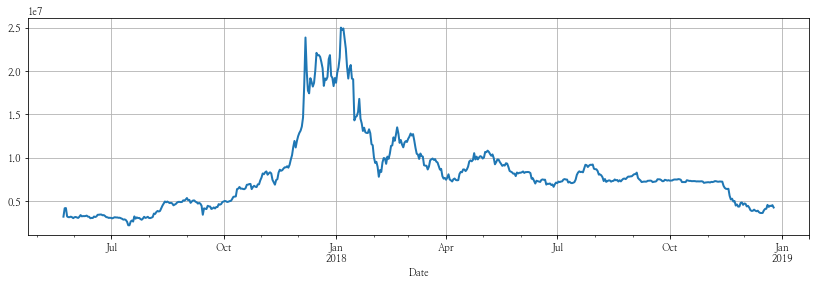

In [22]:
import FinanceDataReader as fdr

# 비트코인 원화 가격 (빗썸), 2016년~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()

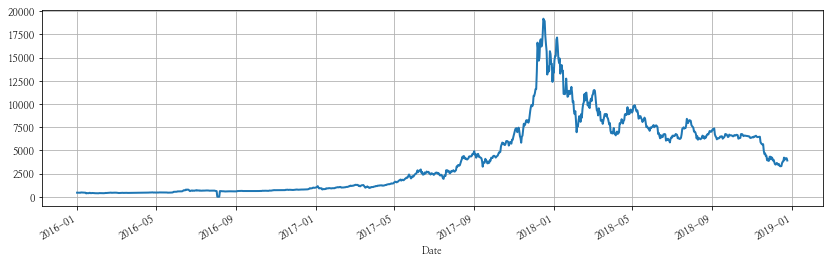

In [24]:
import FinanceDataReader as fdr

# 비트코인 USD 가격
df = fdr.DataReader('BTC/USD', '2016')
df['Close'].plot()

### 2018 https://fb.com/financedata